##### Exercise 06
##### L.H.N.WIJEWARDENA

Question 1

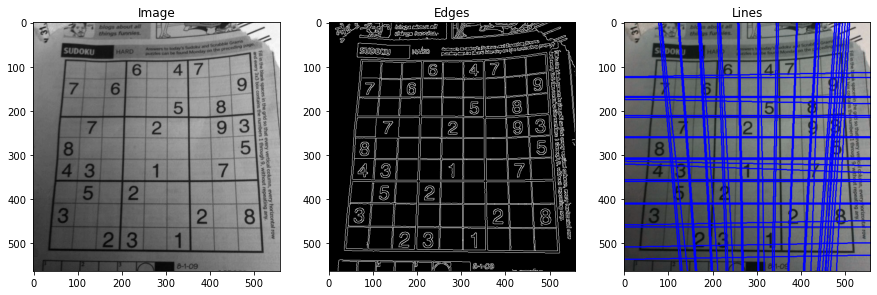

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('sudoku.png', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0+1000*(-b)), int(y0+1000*(-a))
    x2,y2 = int(x0-1000*(-b)), int(y0-1000*(-a))
    cv.line(im, (x1,y1),(x2,y2),(0,0,255),2)


fig,ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow( gray, cmap = "gray")
ax[0].set_title("Image")

ax[1].imshow(edges, cmap= "gray")
ax[1].set_title("Edges")

ax[2].imshow(im, cmap = "gray")
ax[2].set_title("Lines")


plt.show()

Question 2

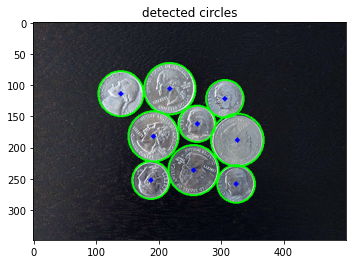

In [21]:

im = cv.imread('coins.jpg', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50, param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)

cv.imshow('detected circles',im)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax = plt.subplots()
ax.imshow( im, cmap = "gray")
ax.set_title("detected circles")

plt.show()



Question 3

In [23]:

im = cv.imread('pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
templ = cv.imread('templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("x = {}, y = {}.scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out, p1, p2, (0,0,255))

cv.namedWindow("Image",cv.WINDOW_NORMAL)
cv.imshow("Image", templ)
cv.waitKey()
cv.imshow("Image", im)
cv.waitKey()
cv.imshow("Image", out)
cv.waitKey()
cv.destroyAllWindows()

error: OpenCV(4.5.2) ..\modules\imgproc\src\deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'cv::Sobel'
